# Introducing Long-Range Forecasting MA Models using Numpy
## DS150 Time Series Analysis

<CENTER> <i> <b> Acenas, Shaun Marvin &nbsp &nbsp |&nbsp &nbsp  Carreon, Ma. Addine Anne

In [2]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

For us to utilize forecasting, we would then reconstruct the forecasts with the decomposed model. As a simple example:

In [3]:
btc_data = pd.read_csv('btc_subset.csv', parse_dates=['date'], usecols=['date','close'])

In [4]:
btc_data.head()

,date,close
0,2018-10-31,6303.27
1,2018-10-30,6269.46
2,2018-10-29,6266.52
3,2018-10-28,6405.57
4,2018-10-27,6407.66


In [5]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    183 non-null    datetime64[ns]
 1   close   183 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


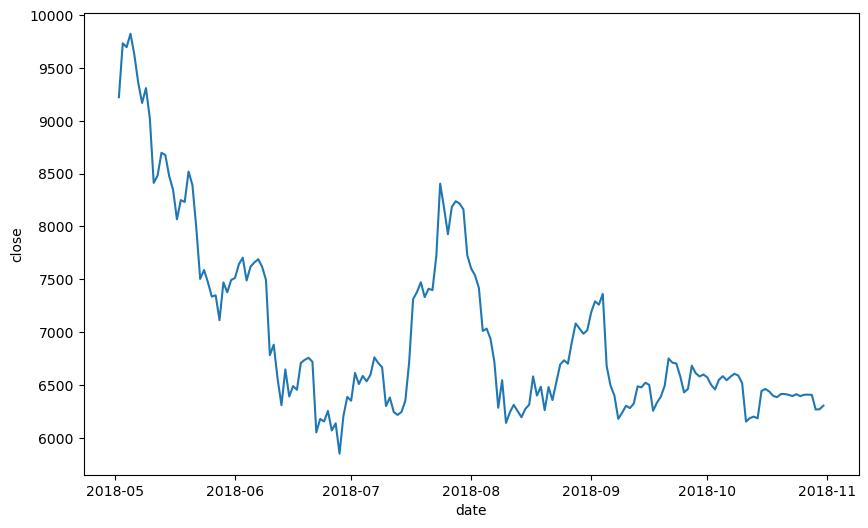

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=btc_data, x='date', y='close', ax=ax)

plt.show()

To forecase the given time series data, we would first decompose the time series by utilizing differencing and MA modeling. Take note that there are certain conditions to be met before doing the MA process.

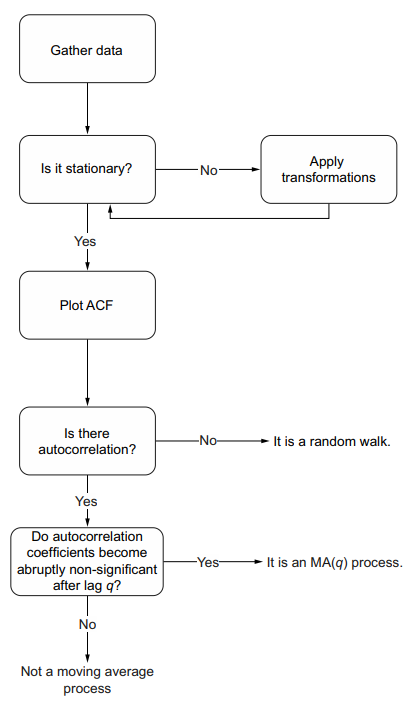

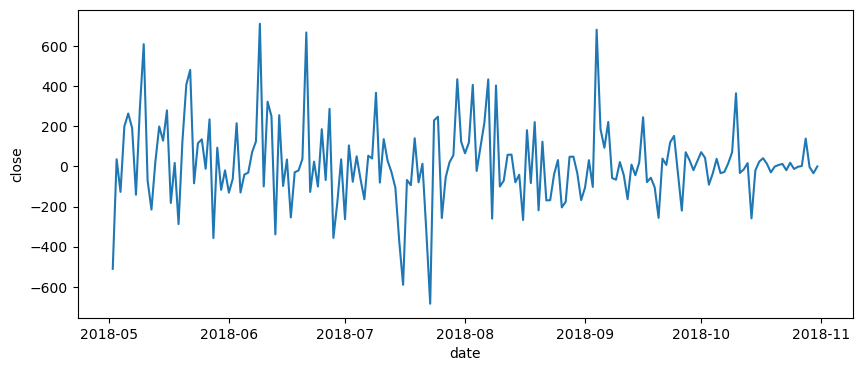

In [7]:
# Differencing to get stationary data

fig, ax = plt.subplots(figsize=(10,4))

sns.lineplot(x=btc_data['date'], y=btc_data['close'].diff().fillna(0), ax=ax)

plt.show()

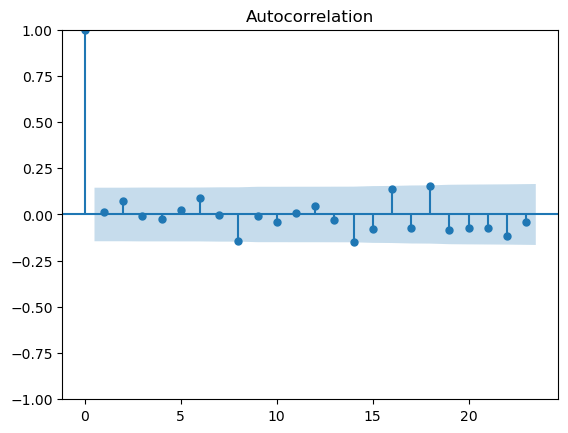

In [8]:
# Lags are significant at q=18

plot_acf(btc_data['close'].diff().fillna(0))

plt.show()

Since that the lags are at high when $q=16$ and $q=18$ but the latter seems to be at a higher correlation value, we would then use MA-18 in the process.

Before else, we would then store the differenced values.

In [9]:
diff_data = btc_data['close'].diff().fillna(0)
diff_data

0        0.00
1      -33.81
2       -2.94
3      139.05
4        2.09
        ...  
178    264.02
179    199.74
180   -126.71
181     35.86
182   -510.43
Name: close, Length: 183, dtype: float64

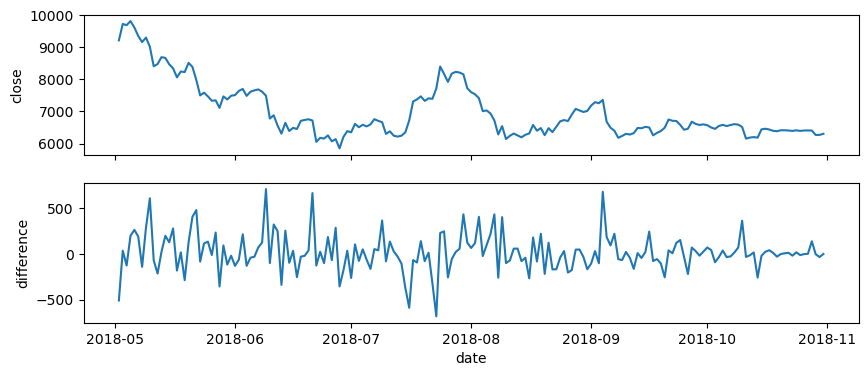

In [10]:
fig, ax = plt.subplots(nrows=2, figsize=(10,4), sharex=True)

sns.lineplot(x=btc_data['date'], y=btc_data['close'], ax=ax[0])
sns.lineplot(x=btc_data['date'], y=diff_data, ax=ax[1])

ax[1].set_ylabel('difference')

plt.show()

Afterwards, we would utilize `np.convolve()` as a trick to perform moving averages across the time series data.

In [11]:
# We would then compute for the moving average using MA-18

MA_Q = 18
conv_array = np.repeat(1/(MA_Q+1), MA_Q+1)
conv_array

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158])

In [12]:
# Get bounds of the valid MA values
bound_val = int(MA_Q/2)
btc_data.iloc[bound_val:-bound_val,0]

9     2018-10-22
10    2018-10-21
11    2018-10-20
12    2018-10-19
13    2018-10-18
         ...    
169   2018-05-15
170   2018-05-14
171   2018-05-13
172   2018-05-12
173   2018-05-11
Name: date, Length: 165, dtype: datetime64[ns]

In [13]:
ma_data = np.convolve(diff_data, conv_array, mode='valid')
ma_data

array([  -5.45157895,   -6.21684211,   -6.14210526,   13.21210526,
          9.64368421,   10.37315789,    9.02789474,    7.92368421,
          8.95578947,    8.11315789,    2.66894737,    4.55894737,
          8.33368421,   11.28157895,    9.64210526,    9.13      ,
         11.60105263,    1.04052632,   12.94684211,   20.09631579,
         27.21421053,   29.32894737,   12.20526316,   -5.04315789,
        -11.38684211,  -12.91      ,  -15.24      ,   -4.32315789,
         -1.44263158,    1.03894737,   -0.75263158,  -13.09210526,
        -16.72736842,  -14.59947368,  -19.72210526,  -26.49      ,
         -3.23736842,    3.37368421,    5.14631579,   34.67263158,
         28.89368421,   28.46631579,   36.42263158,   33.10263158,
         34.29842105,   40.97052632,   30.57684211,   20.22947368,
         11.78684211,   12.98421053,   19.49947368,   12.89578947,
          2.83      ,   12.80157895,    4.34263158,    4.31526316,
         -4.93736842,   -5.21842105,  -55.13105263,  -51.93105

One drawback to this process is that the MA computation process via `np.convolve` would take the 9 values before and after the given timestep (total of 18), there will be numbers at the beginning and end of time series that are unavailable. Since the first and last 9 values would be not applicable as the data is insufficient for computing the MA-values.

Although, it is perfectly valid to compute for MA using the last 18 values in the time series. You may device a workaround to compute for the MA with the previous timesteps only.

Overall, the MA process would evolve to the following output. Notice that the red line is the values derived in the MA(18) process, which gradually change in correspond to the differenced values.

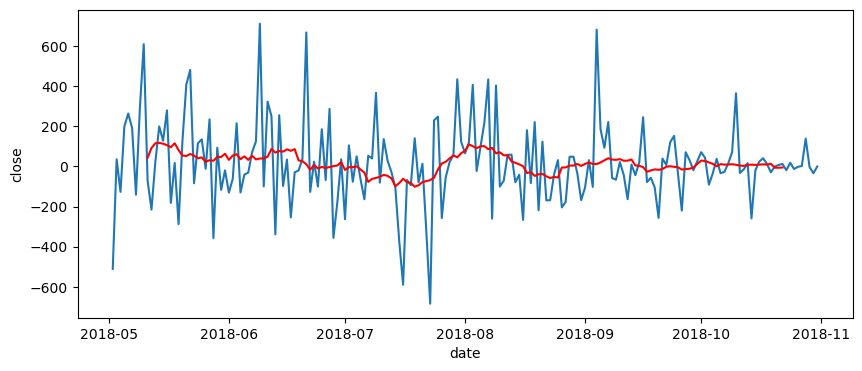

In [14]:
fig, ax = plt.subplots(figsize=(10,4))

sns.lineplot(x=btc_data['date'], y=diff_data, ax=ax)
sns.lineplot(x=btc_data.iloc[bound_val:-bound_val,0], y=ma_data, ax=ax, color='red')

plt.show()

After performing the MA process, we can compute for the residual values by subtracting the differenced data with the average value from the MA(18) process.

In [15]:
resid_data = diff_data.iloc[bound_val:-bound_val] - ma_data
resid_data

9       18.101579
10      13.536842
11       5.622105
12     -42.612105
13       3.076316
          ...    
169     15.117895
170     81.664737
171    -93.236842
172   -306.998421
173   -113.876842
Name: close, Length: 165, dtype: float64

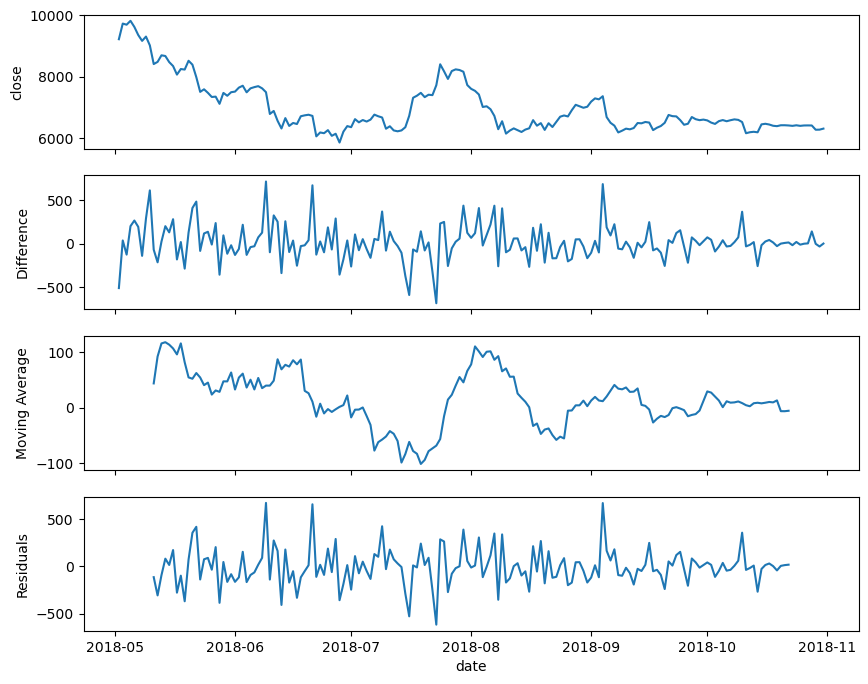

In [16]:
fig, ax = plt.subplots(nrows=4, figsize=(10,8), sharex=True)

sns.lineplot(x=btc_data['date'], y=btc_data['close'], ax=ax[0])
sns.lineplot(x=btc_data['date'], y=diff_data, ax=ax[1])
sns.lineplot(x=btc_data.iloc[bound_val:-bound_val,0], y=ma_data, ax=ax[2])
sns.lineplot(x=btc_data.iloc[bound_val:-bound_val,0], y=resid_data, ax=ax[3])

ax[1].set_ylabel('Difference')
ax[2].set_ylabel('Moving Average')
ax[3].set_ylabel('Residuals')

plt.show()

One particular characteristic about the residuals is that it follows a normal distribution. This means that if the given residuals follows such a distribution, then we have completely decomposed the given time series and we can use the residuals as part of our forecasting process.

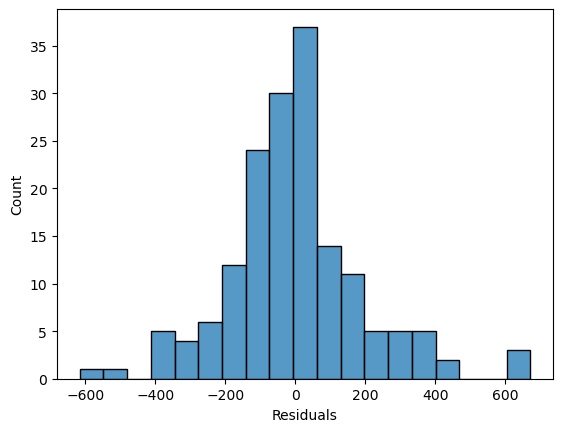

In [17]:
fig, ax = plt.subplots()

sns.histplot(x=resid_data, ax=ax)
ax.set_xlabel('Residuals')

plt.show()

### Activity: Forecasting using Residuals

Now that the decomposition is complete, we can then use the residuals to generate forecasts in the model.

Since the residuals follow the normal distribution, we can simulate the forecasting process using a familiar concept, namely...

***Bootstrapping***

#### Instructions

From bootstrap replicates from residual data, reverse-engineer the decomposition process to reach the forecast values in the data.

1. From the given residual data, generate `100` sets of `14` bootstrap replicates.
2. For each set in the replicates:
    - Compute for the next `14` average values in the MA(18) process (next values in `ma_data`). The next average value is computed through the average of the last 18 residual values, including the bootstrapped value.
    - Get the element-wise sum between the (first) `14` computed average values and the `14` bootstrap replicates to get the next `14` values in `diff_data`
    - Compute for the cumulative sum in `diff_data` to get the forecasted price.
    - Plot a forecast line on the computed forecast price.

3. With the 100 forecast lines on the plot, create another plot that only shows the highest, the lowest, and the average forecasted value for each day.


## 1. Generating 100 sets of 14 bootsrap replicates

In [44]:
# Write your code here
np.random.seed(150)

n_bootstrap = 100
bootstrap_size = 14


bootstrap_replicates = []
for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(resid_data, size=bootstrap_size, replace=True)
    bootstrap_replicates.append(bootstrap_sample)

## 2. Each set of replicates:
### Compute Next 14 Average Values

In [19]:
pred_MA = [[] for _ in range(100)]
for i in range(len(bootstrap_replicates)):
    for n in range(1, 15):
        first_n_values = bootstrap_replicates[i][:n]
        
        last_14_minus_n_values = resid_data[-(14-n):]
        
        average = np.mean(np.concatenate((first_n_values, last_14_minus_n_values)))
        
        pred_MA[i].append(average)

### Element-wise Sum of Computed Averages and Bootstrap Replicates

In [20]:
pred_diff = [np.add(pred_MA[i], bootstrap_replicates[i]) for i in range(100)]

### Compute Cumulative Sum in diff_data

In [21]:
cumsum_diff = [np.cumsum(arr) for arr in pred_diff]
pred_close = [np.add(arr, btc_data['close'].iloc[0]) for arr in cumsum_diff]

In [22]:
new_dates = pd.date_range(start=btc_data['date'][0], periods=15)[1:]

df_pred_close = pd.DataFrame(pred_close).T
df_pred_close.insert(0, "Date", new_dates)

### Plot Forecast Line on Computed Forecast Price

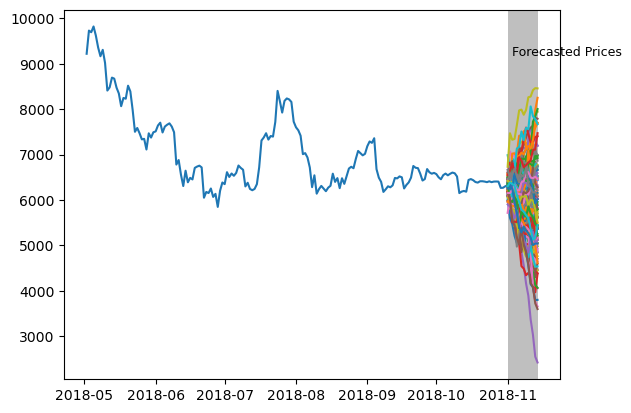

In [23]:
plt.plot(btc_data['date'], btc_data['close'])
for i in range(100):
    plt.plot(df_pred_close['Date'], df_pred_close[i])

plt.axvspan(df_pred_close['Date'][0], df_pred_close['Date'].max(), facecolor="gray", alpha=0.5)
plt.text(df_pred_close['Date'][0], plt.ylim()[1] * 0.9, ' Forecasted Prices', fontsize=9)
plt.show()

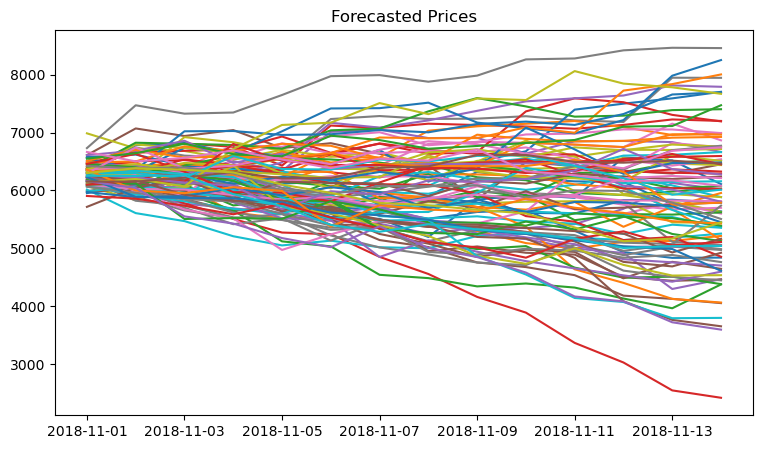

In [24]:
plt.figure(figsize=(9, 5))
for i in range(100):
    plt.plot(df_pred_close['Date'], df_pred_close[i])
plt.title("Forecasted Prices")
plt.show()

## High, Low, and Average Forecasted Value Each Day

In [25]:
min_values = []
max_values = []
avg_values = []

num_elements = len(pred_close[0])

for i in range(num_elements):
    ith_elements = [ndarray[i] for ndarray in pred_close]

    min_values.append(min(ith_elements))
    max_values.append(max(ith_elements))
    avg_values.append(np.mean(ith_elements))

<Axes: xlabel='Date'>

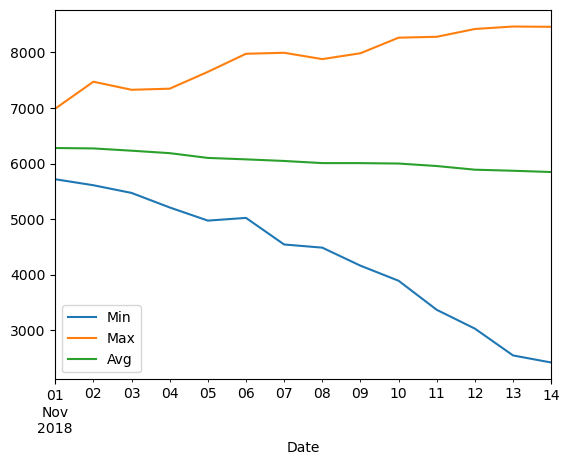

In [26]:
dict = {'Min': min_values, 'Max': max_values, 'Avg': avg_values}
df_min_max_avg = pd.DataFrame(dict)
df_min_max_avg.insert(0, "Date", new_dates)
df_min_max_avg.plot(x='Date', y=['Min', 'Max', 'Avg'])

## Computing Errors

In [35]:
actual_values_forecast = pd.read_csv('actual_values_forecast.csv')
actual_close_forecast = actual_values_forecast['close'] 
actual_close_forecast   

0     6340.99
1     6350.43
2     6335.00
3     6421.76
4     6403.20
5     6447.50
6     6501.00
7     6405.49
8     6325.00
9     6349.32
10    6357.54
11    6318.00
12    6260.91
13    5595.91
Name: close, dtype: float64

In [36]:
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = np.finfo(np.float64).eps
    mape = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), epsilon)
    output_errors = np.average(mape, axis=0)

    return np.average(output_errors)

In [37]:
mape = []

for i in range(100):
    error = mean_absolute_percentage_error(actual_close_forecast, pred_close[i])
    mape.append(error)

In [38]:
mean_mape = np.mean(mape)
print(f'\033[1mAverage MAPE of Bootstrapped Predictions:\033[0m {mean_mape}')

Average MAPE of Bootstrapped Predictions: 0.09381514521634926


In [42]:
index_least_acc_pred = mape.index(max(mape))
print(f'\033[1mLeast Accurate Prediction:\033[0m {pred_close[index_least_acc_pred]}')
print(f'\033[1mMAPE:\033[0m {mape[index_least_acc_pred]}')

Least Accurate Prediction: [6105.34883459 6096.69984962 5777.75263158 5508.64992481 5273.72045113
 5244.96150376 4853.89319549 4558.33496241 4162.43007519 3891.01669173
 3368.36545113 3029.6506391  2547.80635338 2420.41909669]
MAPE: 0.29229789671405226


In [43]:
index_most_acc_pred = mape.index(min(mape))
print(f'\033[1mMost Accurate \033[1mPrediction:\033[0m {pred_close[index_most_acc_pred]}')
print(f'\033[1mMAPE:\033[0m {mape[index_most_acc_pred]}')

Most Accurate Prediction: [6408.76105263 6503.66342105 6526.20349624 6429.29804511 6391.37236842
 6314.62710526 6225.6256015  6410.1912782  6374.37334586 6308.93169173
 6355.05996241 6333.93879699 6306.5431203  6290.52606355]
MAPE: 0.020015669738412598
